## MESEC

1. Za trenutnog posmatrača u Beogradu odštampati trenutke lokalnog vremena za:
- Prethodni i sledeći pun Mesec
- Prethodni i sledeći mladi Mesec
- Prethodni i sledeći izlazak Meseca
- Prethodni i sledeći zalazak Meseca

In [1]:
import ephem
import datetime

now = datetime.datetime.now()
moon = ephem.Moon()
bg = ephem.Observer()
bg.date = now
bg.lat = "44.8125"
bg.lon = "20.4612"

print("Pun Mesec")
print(f"  Prethodni: {ephem.localtime(ephem.previous_full_moon(now))}")
print(f"  Sledeći:   {ephem.localtime(ephem.next_full_moon(now))}")
print()

print("Mladi Mesec")
print(f"  Prethodni: {ephem.localtime(ephem.previous_new_moon(now))}")
print(f"  Sledeći:   {ephem.localtime(ephem.next_new_moon(now))}")
print()

print("Izlazak Meseca")
print(f"  Prethodni: {ephem.localtime(bg.previous_rising(moon))}")
print(f"  Sledeći:   {ephem.localtime(bg.next_rising(moon))}")
print()

print("Zalazak Meseca")
print(f"  Prethodni: {ephem.localtime(bg.previous_setting(moon))}")
print(f"  Sledeći:   {ephem.localtime(bg.next_setting(moon))}")
print()

Pun Mesec
  Prethodni: 2022-11-08 12:02:07.315594
  Sledeći:   2022-12-08 05:08:09.199030

Mladi Mesec
  Prethodni: 2022-11-23 23:57:12.126464
  Sledeći:   2022-12-23 11:16:51.210484

Izlazak Meseca
  Prethodni: 2022-11-29 12:11:02.062408
  Sledeći:   2022-11-30 12:37:33.333411

Zalazak Meseca
  Prethodni: 2022-11-28 20:40:58.530258
  Sledeći:   2022-11-29 22:00:53.367158



2. Odrediti položaj Meseca u horizontskom koordinatnom sistemu u naredna 24 časa za svaki sat i prikazati na grafiku.

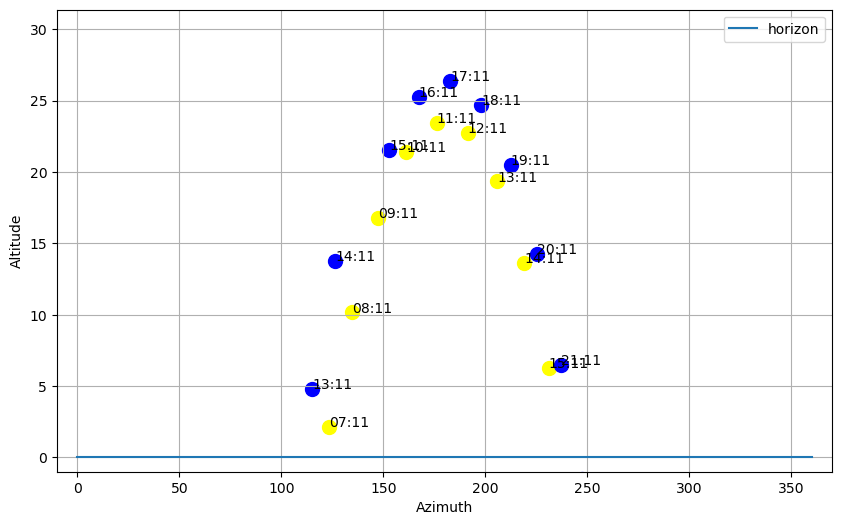

In [2]:
import numpy as np
import matplotlib.pyplot as plt

now = datetime.datetime.now()

def scatter_txt(date, x, y, color):
    txt = ephem.localtime(date).strftime("%H:%M")
    plt.scatter(x, y, 100, color)
    plt.annotate(txt, (x, y))

plt.figure(figsize=(10,6))  
sun = ephem.Sun()
max_x = -90
for i in range(24):
    bg.date = now + datetime.timedelta(hours=i)
    moon.compute(bg)
    scatter_txt(bg.date, np.rad2deg(moon.az), np.rad2deg(moon.alt), "blue")
        
    sun.compute(bg)
    scatter_txt(bg.date, np.rad2deg(sun.az), np.rad2deg(sun.alt), "yellow")

    if np.rad2deg(moon.alt) > max_x:
        max_x = np.rad2deg(moon.alt)
        
    if np.rad2deg(sun.alt) > max_x:
        max_x = np.rad2deg(sun.alt)

plt.xlim([-10, 370])
plt.xlabel("Azimuth")
plt.ylim([-1, max_x+5])
plt.ylabel("Altitude")
plt.plot(np.linspace(0, 360, 10), np.zeros(10), label="horizon")
plt.legend()
plt.grid()
plt.show()

11. Odrediti koordinate u horizontskom sistemu za Mesec u toku tekućeg meseca i prikazati faze Meseca koristeći se *moon_phase.ttf* fontom (dostupan na [ovom linku]) i pored svake faze ispisati redni broj dana u mesecu.

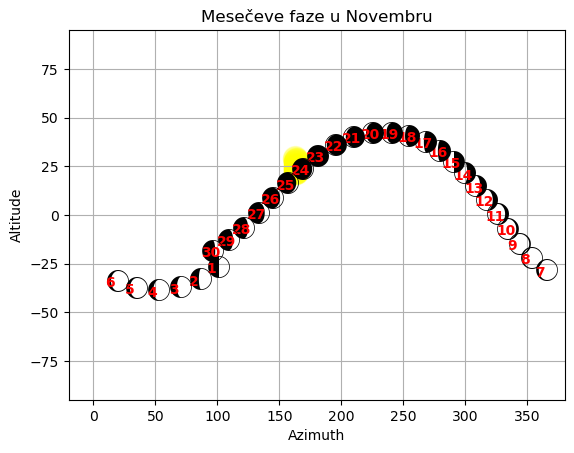

In [4]:
from matplotlib import font_manager
from scipy.interpolate import interp1d

moon_font = font_manager.FontProperties(fname="resources/moon_phases.ttf", size="xx-large")
plt.gca().set_title("Mesečeve faze u Novembru")

bg.date = "2022/11/1 9:20:00" # ovo printuje Mesec za 11 uveče
# možda treba da nađem maksimalnu visinu npr?

moon.compute(bg)

prv = ephem.previous_new_moon(bg.date)
nxt = ephem.next_new_moon(bg.date)
#ABCDEFGHIJKLMNOPQRSTUVWXYZ0 = 27
multip = 27/(nxt-prv)

now = bg.date
for i in range(30):
    bg.date = now + ephem.Date(i)
    moon.compute(bg)
    
    prv = ephem.previous_new_moon(bg.date)
    nxt = ephem.next_new_moon(bg.date)
    phase = int((bg.date-prv)*multip)
    
    if phase == 26:
        phase = ord("0")-ord("A")

    plt.annotate(chr(ord("A") + phase), (np.rad2deg(moon.az), np.rad2deg(moon.alt)), fontproperties=moon_font)
    plt.annotate(str(i+1), (np.rad2deg(moon.az), np.rad2deg(moon.alt)+3), color="red", weight="bold")
    
    sun.compute(bg)
    plt.scatter(np.rad2deg(sun.az), np.rad2deg(sun.alt), s=300, color="yellow", alpha=0.2)
    
plt.xlim([-20, 380])
plt.xlabel("Azimuth")
plt.ylim([-95, 95])
plt.ylabel("Altitude")
plt.grid()
plt.show()

## POMRAČENJA

In [40]:
now = datetime.datetime.now()
end = start + datetime.timedelta(days=10*365)

sun = ephem.Sun()
moon = ephem.Moon()
bg = ephem.Observer()
bg.lat = "44.83"
bg.lon = "20.5"


while now <= end:
    bg.date = now
    moon.compute(bg)
    sun.compute(bg)

    separation = abs(float(ephem.separation(moon, sun)))
    if separation < np.deg2rad(0.556666667):
        print(now.strftime("%d:%m:%Y, %H:%M:%S"))
        now += datetime.timedelta(days = 1)
        
    else:
        now += datetime.timedelta(minutes = 5)
    

14:10:2023, 17:56:46
08:04:2024, 18:51:46
29:03:2025, 11:06:46


KeyboardInterrupt: 

In [52]:
now = datetime.datetime.now()
end = start + datetime.timedelta(days=10*365)

while now <= end:
    bg.date = now
    moon.compute(bg)
    sun.compute(bg)

    separation = abs(float(ephem.separation(moon, sun)) - np.deg2rad(180))
    #print(separation)
    if separation < np.deg2rad(0.9):
        print(now.strftime("%d:%m:%Y, %H:%M:%S"))
        now += datetime.timedelta(days = 1)
        
    else:
        now += datetime.timedelta(hours = 1)
    

06:04:2023, 05:04:54
28:10:2023, 18:04:54
25:03:2024, 06:04:54
17:10:2024, 11:04:54
14:03:2025, 06:04:54
28:08:2026, 05:04:54
22:01:2027, 12:04:54
17:08:2027, 08:04:54
12:01:2028, 04:04:54
31:12:2028, 14:04:54
26:06:2029, 04:04:54
20:12:2029, 21:04:54
15:06:2030, 16:04:54
30:10:2031, 08:04:54
25:04:2032, 14:04:54
18:10:2032, 17:04:54
